In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelBinarizer

In [3]:
df=pd.read_csv("C:/Users/hp/Downloads/datasets/Churn.csv")

In [4]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Intl Plan         3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [7]:
df.dtypes

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Intl Plan           int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
State              object
Area Code           int64
Phone              object
dtype: object

In [8]:
df.isnull().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Intl Plan         0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [10]:
# changing the data types
df['Churn'] = df['Churn'].astype('category')
df['Intl Plan'] = df['Intl Plan'].astype('category')
df['VMail Plan'] = df['VMail Plan'].astype('category')

In [11]:
df2 = df[['Area Code','Phone','State']]

In [12]:
df.drop(['Area Code','Phone','State'],axis=1,inplace=True)

In [13]:
# finding correlation
df.corr()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


In [14]:
df.corr().unstack().sort_values().drop_duplicates()

Eve Mins        Day Calls        -0.021451
Eve Charge      Day Calls        -0.021449
Day Calls       Night Calls      -0.019557
CustServ Calls  Day Calls        -0.018942
Intl Calls      CustServ Calls   -0.017561
Intl Mins       Night Charge     -0.015214
Night Mins      Intl Mins        -0.015207
Intl Charge     Night Charge     -0.015186
                Night Mins       -0.015180
                Night Calls      -0.013630
Intl Mins       Night Calls      -0.013605
CustServ Calls  Day Charge       -0.013427
Day Mins        CustServ Calls   -0.013423
VMail Message   CustServ Calls   -0.013263
Night Calls     Account Length   -0.013176
Eve Charge      CustServ Calls   -0.012987
Eve Mins        CustServ Calls   -0.012985
CustServ Calls  Night Calls      -0.012802
Eve Charge      Night Charge     -0.012601
Eve Mins        Night Charge     -0.012593
Eve Charge      Night Mins       -0.012592
Night Mins      Eve Mins         -0.012584
                Intl Calls       -0.012353
Night Charg

## MULTICOLLINEAR VARIABLES
Night Mins   ,   Night Charge      0.999999

Eve Charge   ,   Eve Mins          1.000000

Day Charge   ,   Day Mins          1.000000

Intl Charge  ,  Intl Mins         0.999993

## WE NEED TO DISCARD ONE OF THOSE VARIABLES.

{'whiskers': [<matplotlib.lines.Line2D at 0x22189a69fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22189a816a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189a69ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x22189a81d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189a81e10>],
 'means': []}

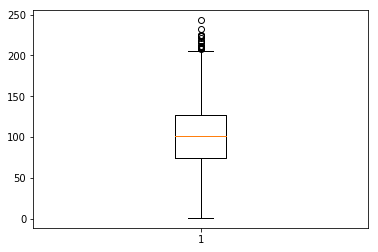

In [15]:
# outliers
plt.boxplot(df['Account Length'])

53.0
206.5
-5.5


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x22189b51a58>,
 'caps': [<matplotlib.lines.Line2D at 0x22189b51e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189b51630>],
 'medians': [<matplotlib.lines.Line2D at 0x22189b5b7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189b5bb00>],
 'means': []}

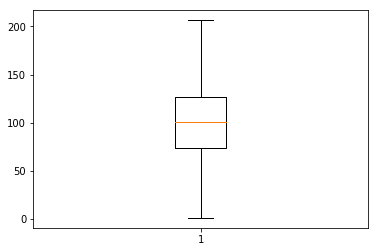

In [16]:
a=df['Account Length'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Account Length'][df['Account Length'] > upper_wishk]=upper_wishk
df['Account Length'][df['Account Length'] <lower_wishk]=lower_wishk
plt.boxplot(df['Account Length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189ba8ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189ba8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189ba8780>],
 'medians': [<matplotlib.lines.Line2D at 0x22189bb1908>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189bb1c50>],
 'means': []}

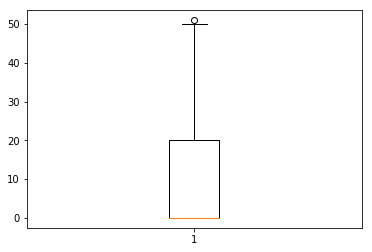

In [17]:
plt.boxplot(df['VMail Message'])

20.0
50.0
-30.0


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x22189c09978>,
 'caps': [<matplotlib.lines.Line2D at 0x22189c09da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189c09550>],
 'medians': [<matplotlib.lines.Line2D at 0x22189c136d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189c13a20>],
 'means': []}

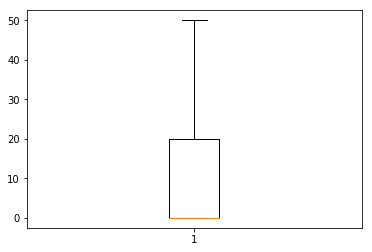

In [18]:
a=df['VMail Message'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['VMail Message'][df['VMail Message'] > upper_wishk]=upper_wishk
df['VMail Message'][df['VMail Message'] <lower_wishk]=lower_wishk
plt.boxplot(df['VMail Message'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189c5bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x22189c67710>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189c5bc18>],
 'medians': [<matplotlib.lines.Line2D at 0x22189c67da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189c67e80>],
 'means': []}

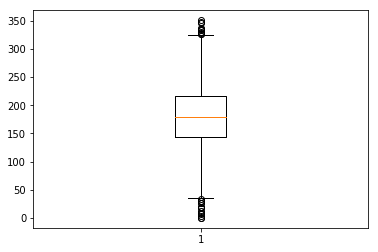

In [19]:
plt.boxplot(df['Day Mins'])

72.70000000000002
325.45000000000005
34.64999999999996


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x22189cc34a8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189cc3b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189cc3080>],
 'medians': [<matplotlib.lines.Line2D at 0x22189cc3f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189ccb550>],
 'means': []}

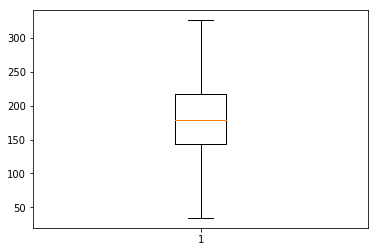

In [20]:
a=df['Day Mins'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Day Mins'][df['Day Mins'] > upper_wishk]=upper_wishk
df['Day Mins'][df['Day Mins'] <lower_wishk]=lower_wishk
plt.boxplot(df['Day Mins'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189d139e8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189d13e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189d135c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22189d1f780>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189d1fac8>],
 'means': []}

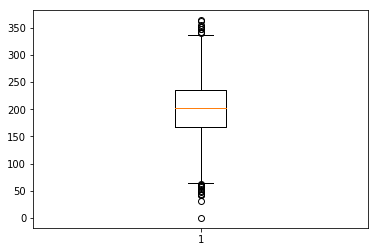

In [21]:
plt.boxplot(df['Eve Mins'])

68.70000000000002
338.35
63.54999999999997


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x22189d70e48>,
 'caps': [<matplotlib.lines.Line2D at 0x22189d79518>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189d70a20>],
 'medians': [<matplotlib.lines.Line2D at 0x22189d79ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189d79ef0>],
 'means': []}

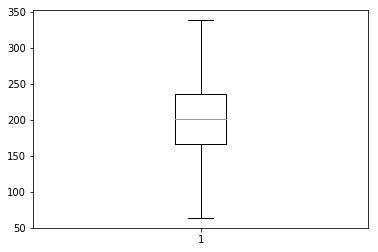

In [22]:
a=df['Eve Mins'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Eve Mins'][df['Eve Mins'] > upper_wishk]=upper_wishk
df['Eve Mins'][df['Eve Mins'] <lower_wishk]=lower_wishk
plt.boxplot(df['Eve Mins'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189dce7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22189dcee80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189dce3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22189dd7550>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189dd7898>],
 'means': []}

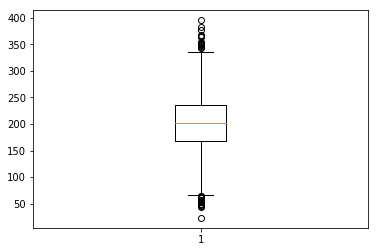

In [23]:
plt.boxplot(df['Night Mins'])

68.30000000000001
337.75
64.54999999999998


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x22189e2cd30>,
 'caps': [<matplotlib.lines.Line2D at 0x22189e36400>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189e2c908>],
 'medians': [<matplotlib.lines.Line2D at 0x22189e36a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189e36dd8>],
 'means': []}

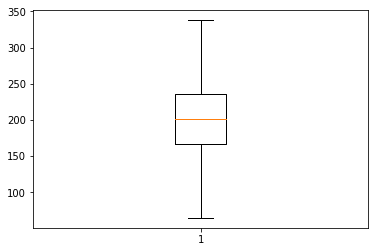

In [24]:
a=df['Night Mins'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Night Mins'][df['Night Mins'] > upper_wishk]=upper_wishk
df['Night Mins'][df['Night Mins'] <lower_wishk]=lower_wishk
plt.boxplot(df['Night Mins'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189e7ceb8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189e8a860>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189e7cd68>],
 'medians': [<matplotlib.lines.Line2D at 0x22189e8af98>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189e91320>],
 'means': []}

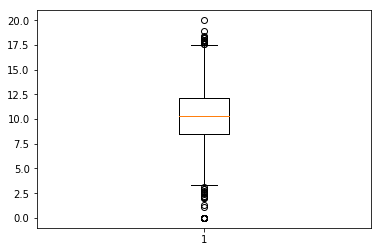

In [25]:
plt.boxplot(df['Intl Mins'])

3.5999999999999996
17.5
3.1000000000000005


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x22189ee4ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189ee4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189ee4780>],
 'medians': [<matplotlib.lines.Line2D at 0x22189eef908>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189eefc50>],
 'means': []}

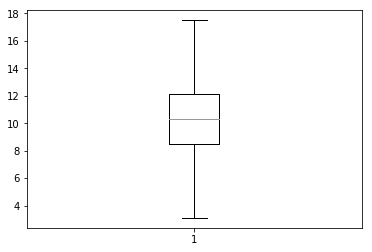

In [26]:
a=df['Intl Mins'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Intl Mins'][df['Intl Mins'] > upper_wishk]=upper_wishk
df['Intl Mins'][df['Intl Mins'] <lower_wishk]=lower_wishk
plt.boxplot(df['Intl Mins'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189f429e8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189f42e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189f425c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22189f4c748>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189f4ca90>],
 'means': []}

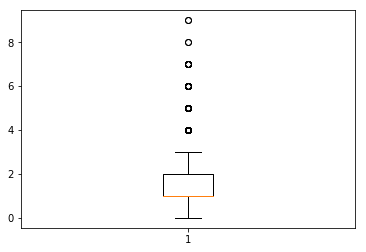

In [27]:
plt.boxplot(df['CustServ Calls'])

1.0
3.5
-0.5


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x22189f96fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22189f9e6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189f96ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x22189f9ed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189f9ee10>],
 'means': []}

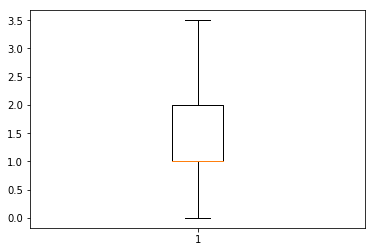

In [28]:
a=df['CustServ Calls'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['CustServ Calls'][df['CustServ Calls'] > upper_wishk]=upper_wishk
df['CustServ Calls'][df['CustServ Calls'] <lower_wishk]=lower_wishk
plt.boxplot(df['CustServ Calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22189ff2eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x22189ffd588>,
 'boxes': [<matplotlib.lines.Line2D at 0x22189ff2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x22189ffdc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x22189ffdf60>],
 'means': []}

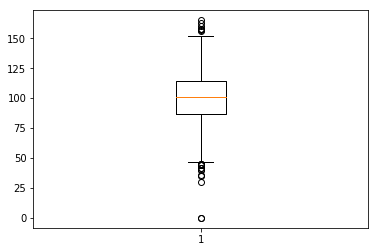

In [29]:
plt.boxplot(df['Day Calls'])

27.0
154.5
46.5


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x2218a04ff98>,
 'caps': [<matplotlib.lines.Line2D at 0x2218a058668>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218a04fb70>],
 'medians': [<matplotlib.lines.Line2D at 0x2218a058cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218a058dd8>],
 'means': []}

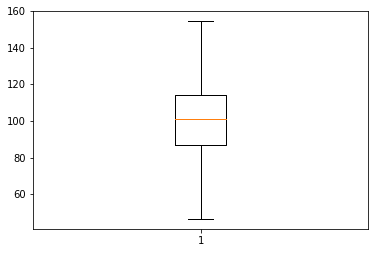

In [30]:
a=df['Day Calls'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Day Calls'][df['Day Calls'] > upper_wishk]=upper_wishk
df['Day Calls'][df['Day Calls'] <lower_wishk]=lower_wishk
plt.boxplot(df['Day Calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218a0ad358>,
 'caps': [<matplotlib.lines.Line2D at 0x2218a0ad9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218a0a1ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x2218a0ade10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218a0b8400>],
 'means': []}

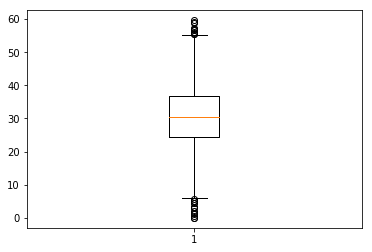

In [31]:
plt.boxplot(df['Day Charge'])

12.36
55.33
5.890000000000001


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x2218a109550>,
 'caps': [<matplotlib.lines.Line2D at 0x2218a109be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218a109128>],
 'medians': [<matplotlib.lines.Line2D at 0x2218a1122b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218a1125f8>],
 'means': []}

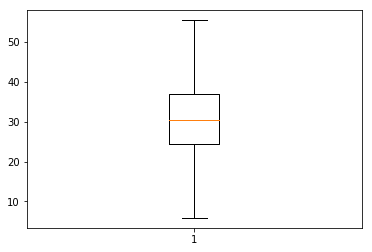

In [32]:
a=df['Day Charge'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Day Charge'][df['Day Charge'] > upper_wishk]=upper_wishk
df['Day Charge'][df['Day Charge'] <lower_wishk]=lower_wishk
plt.boxplot(df['Day Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218a153e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2218a07c7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218a153cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2218a07ce48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218a07cf28>],
 'means': []}

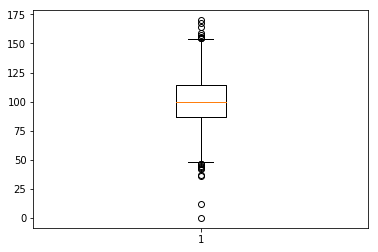

In [33]:
plt.boxplot(df['Eve Calls'])

27.0
154.5
46.5


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x2218a1b2ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x2218a1bd898>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218a1b2da0>],
 'medians': [<matplotlib.lines.Line2D at 0x2218a1bdf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218a1c42b0>],
 'means': []}

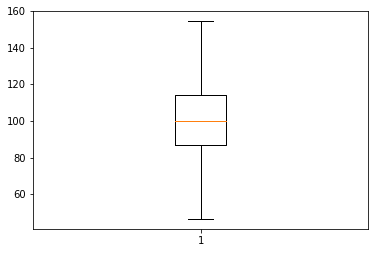

In [34]:
a=df['Eve Calls'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Eve Calls'][df['Eve Calls'] > upper_wishk]=upper_wishk
df['Eve Calls'][df['Eve Calls'] <lower_wishk]=lower_wishk
plt.boxplot(df['Eve Calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b1de5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b1dec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b1de198>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b1e8320>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b1e8668>],
 'means': []}

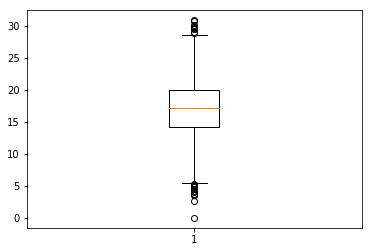

In [35]:
plt.boxplot(df['Eve Charge'])

5.84
28.759999999999998
5.4


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x2218b23a710>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b23ada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b23a2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b245470>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b2457b8>],
 'means': []}

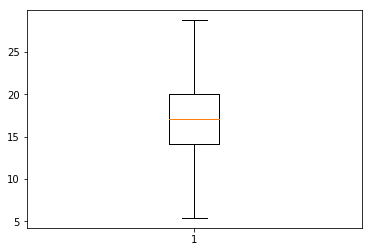

In [36]:
a=df['Eve Charge'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Eve Charge'][df['Eve Charge'] > upper_wishk]=upper_wishk
df['Eve Charge'][df['Eve Charge'] <lower_wishk]=lower_wishk
plt.boxplot(df['Eve Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b28c940>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b28cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b28c518>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b2956a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b2959e8>],
 'means': []}

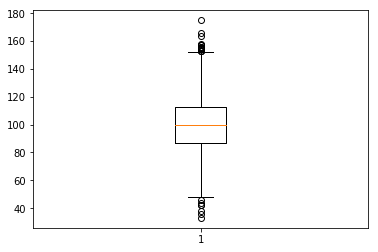

In [37]:
plt.boxplot(df['Night Calls'])

26.0
152.0
48.0


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x2218b2e8dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b2f2780>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b2e8c88>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b2f2e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b2f2ef0>],
 'means': []}

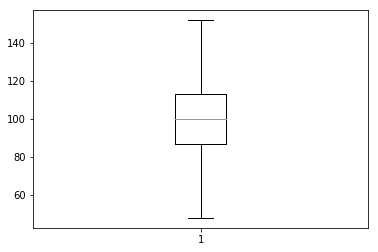

In [38]:
a=df['Night Calls'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Night Calls'][df['Night Calls'] > upper_wishk]=upper_wishk
df['Night Calls'][df['Night Calls'] <lower_wishk]=lower_wishk
plt.boxplot(df['Night Calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b343390>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b343a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b339f28>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b343e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b34d438>],
 'means': []}

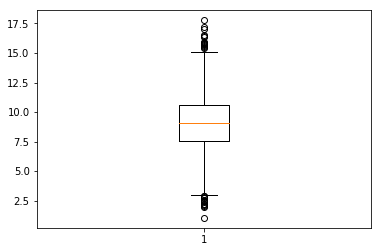

In [39]:
plt.boxplot(df['Night Charge'])

3.0700000000000003
15.195
2.914999999999999


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x2218b398b70>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b398f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b398748>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b3a48d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b3a4c18>],
 'means': []}

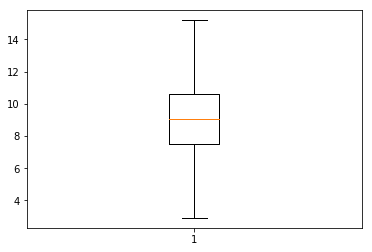

In [40]:
a=df['Night Charge'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Night Charge'][df['Night Charge'] > upper_wishk]=upper_wishk
df['Night Charge'][df['Night Charge'] <lower_wishk]=lower_wishk
plt.boxplot(df['Night Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b3edda0>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b3f7470>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b3ed978>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b3f7b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b3f7e48>],
 'means': []}

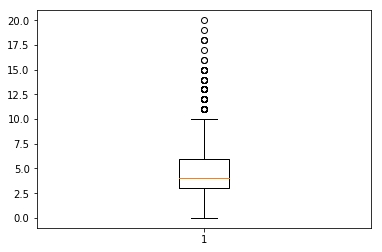

In [41]:
plt.boxplot(df['Intl Calls'])

3.0
10.5
-1.5


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x2218b454860>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b454ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b454438>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b4605c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b460908>],
 'means': []}

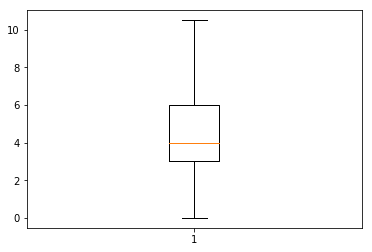

In [42]:
a=df['Intl Calls'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Intl Calls'][df['Intl Calls'] > upper_wishk]=upper_wishk
df['Intl Calls'][df['Intl Calls'] <lower_wishk]=lower_wishk
plt.boxplot(df['Intl Calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2218b4a9d68>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b4b1438>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b4a9940>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b4b1ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b4b1e10>],
 'means': []}

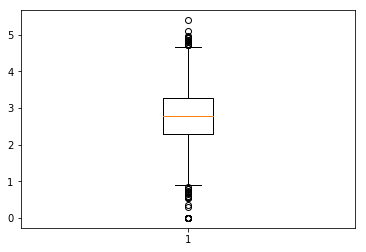

In [43]:
plt.boxplot(df['Intl Charge'])

0.9700000000000002
4.7250000000000005
0.8449999999999995


C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\3.7\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


{'whiskers': [<matplotlib.lines.Line2D at 0x2218b505898>,
 'caps': [<matplotlib.lines.Line2D at 0x2218b505f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x2218b505470>],
 'medians': [<matplotlib.lines.Line2D at 0x2218b50d5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2218b50d940>],
 'means': []}

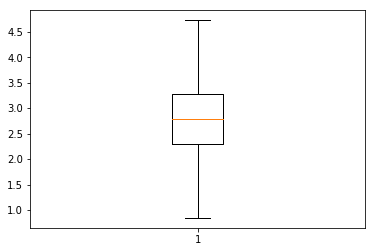

In [44]:
a=df['Intl Charge'].quantile([0.25,0.5,0.75])
IQR=a[0.75]-a[0.25]
print(IQR)
IQR15=1.5*IQR
IQR15
upper_wishk=a[0.75]+IQR15
lower_wishk=a[0.25]-IQR15
print(upper_wishk)
print(lower_wishk)
df['Intl Charge'][df['Intl Charge'] > upper_wishk]=upper_wishk
df['Intl Charge'][df['Intl Charge'] <lower_wishk]=lower_wishk
plt.boxplot(df['Intl Charge'])

In [45]:
x = df[['Account Length', 'VMail Message','CustServ Calls', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]

In [46]:
y=df['Churn']

In [48]:
x=pd.get_dummies(x,columns=['Intl Plan','VMail Plan'],drop_first=True)

KeyError: "None of [Index(['Intl Plan', 'VMail Plan'], dtype='object')] are in the [columns]"

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1026)

# logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression(class_weight='balanced',random_state=1026)
lr.fit(x_train,y_train)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1026,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [53]:
lr.coef_

array([[-1.16744773e-03,  1.79298672e-02,  5.96532352e-01,
         2.94770207e-03,  6.29982479e-02,  5.08035178e-05,
         7.21835121e-02, -4.49404806e-03,  5.82334950e-02,
        -8.10322078e-02,  2.37947717e-01,  2.17431096e+00,
        -1.38247231e+00]])

In [54]:
lr.intercept_

array([-5.02536392])

# prediction

In [55]:
lr_pred=lr.predict(x_train)

In [56]:
lr_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# validation on train

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
print(confusion_matrix(y_train,lr_pred))

[[1474  500]
 [  90  269]]


In [59]:
print(classification_report(y_train,lr_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1974
           1       0.35      0.75      0.48       359

   micro avg       0.75      0.75      0.75      2333
   macro avg       0.65      0.75      0.66      2333
weighted avg       0.85      0.75      0.78      2333



In [60]:
lr.score(x_train,y_train)

0.7471067295327904

# validation on test set

In [61]:
lr.fit(x_test,y_test)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1026,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [62]:
lr_pred_test=lr.predict(x_test)

In [63]:
print(confusion_matrix(y_test,lr_pred_test))

[[651 225]
 [ 40  84]]


In [64]:
print(classification_report(y_test,lr_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       876
           1       0.27      0.68      0.39       124

   micro avg       0.73      0.73      0.73      1000
   macro avg       0.61      0.71      0.61      1000
weighted avg       0.86      0.73      0.78      1000



In [65]:
lr.score(x_test,y_test)

0.735

# Scalling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc= StandardScaler()

In [68]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1026)

In [70]:
lr1=LogisticRegression(class_weight='balanced',random_state=1026)

In [71]:
lr1.fit(x_train,y_train)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1026,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [72]:
lr1.coef_

array([[-0.01728737,  0.34429666,  0.70724706,  0.11534865,  0.6188183 ,
         0.05768252,  0.36254768, -0.03129474,  0.1878604 , -0.17573054,
         0.22044962,  0.67856736, -0.72180132]])

In [73]:
lr1.intercept_

array([-0.49901286])

In [74]:
lr1_pred=lr1.predict(x_train)

In [75]:
print(confusion_matrix(y_train,lr1_pred))

[[1480  494]
 [  95  264]]


In [76]:
print(classification_report(y_train,lr1_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1974
           1       0.35      0.74      0.47       359

   micro avg       0.75      0.75      0.75      2333
   macro avg       0.64      0.74      0.65      2333
weighted avg       0.85      0.75      0.78      2333



In [77]:
lr1.score(x_train,y_train)

0.7475353621945993

In [78]:
lr1.fit(x_test,y_test)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1026,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [79]:
lr1_pred_test=lr1.predict(x_test)

In [80]:
lr1.intercept_

array([-0.46275539])

In [81]:
lr1.coef_

array([[ 0.14625731,  0.70057658,  0.57581789, -0.10499672,  0.61581485,
        -0.02173084,  0.13615546,  0.07449545,  0.11615229, -0.22668247,
         0.03052817,  0.61712273, -1.01944849]])

In [82]:
print(confusion_matrix(y_test,lr1_pred_test))

[[645 231]
 [ 33  91]]


In [83]:
print(classification_report(y_test,lr1_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       876
           1       0.28      0.73      0.41       124

   micro avg       0.74      0.74      0.74      1000
   macro avg       0.62      0.74      0.62      1000
weighted avg       0.87      0.74      0.78      1000



In [84]:
lr1.score(x_test,y_test)

0.736

# performing random forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(class_weight='balanced',random_state=1026)

In [92]:
rf.fit(x_train,y_train)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=1026, verbose=0, warm_start=False)

In [93]:
rf_pred=rf.predict(x_train)

In [94]:
print(confusion_matrix(y_train,rf_pred))

[[1974    0]
 [  11  348]]


In [95]:
print(classification_report(y_train,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1974
           1       1.00      0.97      0.98       359

   micro avg       1.00      1.00      1.00      2333
   macro avg       1.00      0.98      0.99      2333
weighted avg       1.00      1.00      1.00      2333



In [96]:
rf.score(x_train,y_train)

0.9952850407201028

In [97]:
rf.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=1026, verbose=0, warm_start=False)

In [98]:
rf_pred_test=rf.predict(x_test)

In [99]:
print(confusion_matrix(y_test,rf_pred_test))

[[875   1]
 [  8 116]]


In [100]:
print(classification_report(y_test,rf_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       876
           1       0.99      0.94      0.96       124

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [101]:
rf.score(x_test,y_test)

0.991

In [ ]:
precision=tp/tp+fp=875/(875+1)=0.9988

In [ ]:
recall=tp/tp+fn=875/(875+8)=0.9909

In [ ]:
f1_score=2*(p*r)/p+r=2*(0.9897)/1.9897=0.9948